In [1]:
#import modules for web scraping
from __future__ import print_function, division
import requests
from bs4 import BeautifulSoup
import pickle

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

%matplotlib inline

In [374]:
# starting to scrape ski resort data
# grab data for each relevant ski resort: total snowfall, snow days, average/max base depth, average/max summit depth,
# biggest snowfall days
# injuries per year

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

import os
chromedriver = "/Users/dynogravelso/Documents/GitHub/luther/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [322]:
# go to base page to find the 
url = 'https://www.skiresort.info/ski-resorts/north-america/'
driver = webdriver.Chrome(chromedriver)
driver.get(url)

In [323]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [324]:
soup = BeautifulSoup(driver.page_source, 'html.parser')
#navigate to ski lifts
# ski_lift_selector = '//a[contains(text(), "Ski lifts")]'
# driver.find_element_by_xpath(ski_lift_selector).click()

In [325]:
#find all resorts here
resort_soup = soup.find(id = 'resortList')
sub_list = resort_soup.find_all('a', {'class': 'h3'})    
resorts = [resort.text for resort in sub_list]
all_resorts = []
all_resorts += resorts

In [327]:
def scrape_once(url, all_resorts):
    driver.get(url)
    time.sleep(15)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(0.1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    resort_soup = soup.find(id = 'resortList')
    sub_list = resort_soup.find_all('a', {'class': 'h3'})    
    resorts = [resort.text for resort in sub_list]
    all_resorts += resorts
    return all_resorts
    

In [328]:
#navigate to next page and find 
for i in range(2,6):
    url_new = 'https://www.skiresort.info/ski-resorts/north-america/page/' + str(i) + '/'
    all_resorts = scrape_once(url_new, all_resorts)

In [550]:
#clean up resort names, use resort names to organize into dict
all_resorts = [resort.strip() for resort in all_resorts]
len(all_resorts)

4070

In [545]:
#opening the browser to scrape the names of all NA resorts
from collections import defaultdict
all_states = ['colorado','utah','wyoming','montana','idaho','new-mexico','arizona','california','lake-tahoe','nevada','oregon','washington','alaska','new-york','pennsylvania','vermont','new-hampshire','maine','massachusetts','michigan','minnesota','wisconsin','alberta','british-columbia','ontario','quebec']
url_list = ['https://www.onthesnow.com/' + state + '/skireport.html' for state in all_states]
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

caps = DesiredCapabilities().CHROME
# caps["pageLoadStrategy"] = "normal"  #  complete
# caps["pageLoadStrategy"] = "eager"  #  interactive
caps["pageLoadStrategy"] = "none"
driver = webdriver.Chrome(chromedriver, desired_capabilities=caps)

In [443]:
# grab all resort names and organize into dict
for i, url in enumerate(url_list):
    #grab all the resort names here and append to resort_list
    driver.get(url)
    time.sleep(10)
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    resort_soup = soup.find_all('div', {'class': 'name link-light'})
    for resort in resort_soup:
        resort_dict[all_states[i]] = resort_dict[all_states[i]] + [resort.a.text]   

In [541]:
# change resort name dict to make ready for urls
import copy
resort_dict_urlf = resort_dict.copy()
for key in resort_dict_urlf:
    for i, value in enumerate(resort_dict_urlf[key]):
        resort_dict_urlf[key][i] = value.replace(' - ',' ').replace('.','').replace(' / ','-').replace("'","")
resort_dict_urlf['quebec'][0] = 'ski-bromont'
resort_dict_urlf['colorado'][-11] = 'durango-mountain-resort'
resort_dict_urlf['colorado'][-9] = 'ski-cooper'
print(resort_dict_urlf['utah'][5])
resort_dict_urlf['utah'][5] = 'wolf-creek'
print(resort_dict_urlf['utah'][6])
resort_dict_urlf['utah'][6] = 'park-city-mountain-resort'
print(resort_dict_urlf['wyoming'][2])
resort_dict_urlf['wyoming'][2] = 'hogadon'
print(resort_dict_urlf['wyoming'][4])
resort_dict_urlf['wyoming'][4] = 'snowy-range-ski-recreation-area'
resort_dict_urlf['montana'][-2] = 'showdown-ski-area'
resort_dict_urlf['montana'][-1] = 'teton-pass-ski-area'
resort_dict_urlf['new-mexico'][5] = 'sipapu-ski-and-summer-resort'
resort_dict_urlf['new-mexico'][-1] = 'enchanted-forest-cross-countryski-area'
resort_dict_urlf['california'][0] = 'badger-pass'
resort_dict_urlf['california'][3] = 'boreal'
resort_dict_urlf['california'][-10] = 'mount-shasta-board-ski-park'
resort_dict_urlf['california'][-3] = 'squaw-valley-usa'
resort_dict_urlf['nevada'][1] = 'las-vegas-ski-and-snowboard-resort'
resort_dict_urlf['oregon'][2] = 'mount-ashland'
resort_dict_urlf['oregon'][5] = 'mt-hood-ski-bowl'
resort_dict_urlf['oregon'][6] = 'mount-ashland'
resort_dict_urlf['new-york'][3] = 'catamount-ski-ride-area'
resort_dict_urlf['pennsylvania'][3] = 'blue-mountain-ski-area'
resort_dict_urlf['pennsylvania'][9] = 'sno-mountain'
resort_dict_urlf['pennsylvania'][-2] = 'big-bear'
resort_dict_urlf['vermont'][-6] = 'pico-mountain-at-killington'
resort_dict_urlf['michigan'][4] = 'blackjack-ski-resort'
resort_dict_urlf['michigan'][7] = 'caberfae-peaks-ski-golf-resort'
resort_dict_urlf['michigan'][10] = 'indianhead-mountain'
resort_dict_urlf['michigan'][12] = 'mount-brighton'
resort_dict_urlf['michigan'][13] = 'mount-holiday-ski-area'
resort_dict_urlf['michigan'][19] = 'shanty-creek'
resort_dict_urlf['minnesota'][5] = 'hyland-ski-snowboard-area'
resort_dict_urlf['minnesota'][-3] = 'wild-mountain-ski-snowboard-area'
resort_dict_urlf['minnesota'][-2] = 'coffee-mill-ski-snowboard-area'
resort_dict_urlf['minnesota'][-1] = 'elm-creek'
resort_dict_urlf['british-columbia'][6] = 'mount-seymour'
resort_dict_urlf['british-columbia'][10] = 'silver-star'
resort_dict_urlf['british-columbia'][13] = 'whitewater'
resort_dict_urlf['british-columbia'][-3] = 'revelstoke-mountain'
resort_dict_urlf['british-columbia'][-2] = 'hemlock-valley-resort'


resort_dict_urlf

wolf-creek
park-city-mountain-resort
hogadon
snowy-range-ski-recreation-area


defaultdict(list,
            {'colorado': ['Arapahoe Basin Ski Area',
              'Aspen-Snowmass',
              'Beaver Creek',
              'Breckenridge',
              'Copper Mountain Resort',
              'Crested Butte Mountain Resort',
              'Eldora Mountain Resort',
              'Howelsen Hill',
              'Keystone',
              'Loveland',
              'Monarch Mountain',
              'Powderhorn',
              'durango-mountain-resort',
              'Ski Granby Ranch',
              'ski-cooper',
              'Steamboat',
              'Sunlight Mountain Resort',
              'Telluride',
              'Vail',
              'Winter Park Resort',
              'Wolf Creek Ski Area',
              'Silverton Mountain',
              'Echo Mountain'],
             'utah': ['Alta Ski Area',
              'Beaver Mountain',
              'Brian Head Resort',
              'Brighton Resort',
              'Deer Valley Resort',
              'wolf-creek',

In [547]:
#setting up dict to scrape into
hist_snow_states = {}
for state in resort_dict_urlf:
    hist_snow_states[state] = {}
    for resort in resort_dict_urlf[state]:
        hist_snow_states[state][resort] = []
hist_snow_states

{'colorado': {'Arapahoe Basin Ski Area': [],
  'Aspen-Snowmass': [],
  'Beaver Creek': [],
  'Breckenridge': [],
  'Copper Mountain Resort': [],
  'Crested Butte Mountain Resort': [],
  'Eldora Mountain Resort': [],
  'Howelsen Hill': [],
  'Keystone': [],
  'Loveland': [],
  'Monarch Mountain': [],
  'Powderhorn': [],
  'durango-mountain-resort': [],
  'Ski Granby Ranch': [],
  'ski-cooper': [],
  'Steamboat': [],
  'Sunlight Mountain Resort': [],
  'Telluride': [],
  'Vail': [],
  'Winter Park Resort': [],
  'Wolf Creek Ski Area': [],
  'Silverton Mountain': [],
  'Echo Mountain': []},
 'utah': {'Alta Ski Area': [],
  'Beaver Mountain': [],
  'Brian Head Resort': [],
  'Brighton Resort': [],
  'Deer Valley Resort': [],
  'wolf-creek': [],
  'park-city-mountain-resort': [],
  'Powder Mountain': [],
  'Snowbasin': [],
  'Snowbird': [],
  'Solitude Mountain Resort': [],
  'Sundance': [],
  'Eagle Point': []},
 'wyoming': {'Snow King Resort': [],
  'Grand Targhee Resort': [],
  'hogadon'

In [539]:
#for each key and corresponding values in constructed resort dict go to the page and collect snow data ONLY FOR 2017
for i, state in enumerate(resort_dict_urlf):
    for j, resort in enumerate(resort_dict_urlf[state]):
        url = 'https://www.onthesnow.com/' + state + '/' + resort.lower().replace(' ','-') + '/historical-snowfall.html'
        driver.get(url)
        time.sleep(4)
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        soup = BeautifulSoup(driver.page_source, 'lxml')
        table_soup = soup.find('div', {'class': 'resBox hist_stats_main'})
        try:
            snow = table_soup.find_all('strong')
        except AttributeError:
            hist_snow_states[state][resort] = []
            print(state,resort,'fail')
            continue
        print(state,resort,'success')
#         print(hist_snow_states[state][resort])
        for s in snow:
            hist_snow_states[state][resort] = hist_snow_states[state][resort] + [s.text]    
    with open(str(state) + '.pkl', 'wb') as picklefile:
        pickle.dump(hist_snow_states[state], picklefile)

colorado Arapahoe Basin Ski Area success
colorado Aspen-Snowmass success
colorado Beaver Creek success
colorado Breckenridge success
colorado Copper Mountain Resort success
colorado Crested Butte Mountain Resort success
colorado Eldora Mountain Resort success
colorado Howelsen Hill success
colorado Keystone success
colorado Loveland success
colorado Monarch Mountain success
colorado Powderhorn success
colorado durango-mountain-resort success
colorado Ski Granby Ranch success
colorado ski-cooper success
colorado Steamboat success
colorado Sunlight Mountain Resort success
colorado Telluride success
colorado Vail success
colorado Winter Park Resort success
colorado Wolf Creek Ski Area success
colorado Silverton Mountain success
colorado Echo Mountain success
utah Alta Ski Area success
utah Beaver Mountain success
utah Brian Head Resort success
utah Brighton Resort success
utah Deer Valley Resort success
utah Nordic Valley Resort fail
utah Park City fail
utah Powder Mountain success
utah S

massachusetts Bousquet Ski Area success
massachusetts Bradford Ski Area success
massachusetts Ski Butternut success
massachusetts Jiminy Peak success
massachusetts Nashoba Valley success
massachusetts Otis Ridge Ski Area success
massachusetts Wachusett Mountain Ski Area success
massachusetts Blue Hills Ski Area success
massachusetts Ski Ward success
michigan Alpine Valley Ski Area success
michigan Apple Mountain success
michigan Big Powderhorn Mountain success
michigan Bittersweet Ski Area success
michigan Big Snow Resort Blackjack fail
michigan Boyne Highlands success
michigan Boyne Mountain Resort success
michigan Caberfae Peaks fail
michigan Cannonsburg success
michigan Crystal Mountain fail
michigan Big Snow Resort Indianhead Mountain fail
michigan Marquette Mountain success
michigan Mt Brighton fail
michigan Mt Holiday Ski Area fail
michigan Mount Holly success
michigan Mont Ripley success
michigan Norway Mountain success
michigan Nubs Nob Ski Area success
michigan Pine Mountain s

{'colorado': {'Arapahoe Basin Ski Area': ['208 "',
   '64',
   '73 "',
   '42 "',
   '73 "',
   '42 "',
   '14 "'],
  'Aspen-Snowmass': ['233 "', '42', '52 "', '29 "', '80 "', '50 "', '16 "'],
  'Beaver Creek': ['193 "', '43', '68 "', '33 "', '68 "', '33 "', '12 "'],
  'Breckenridge': ['271 "', '62', '83 "', '42 "', '83 "', '42 "', '14 "'],
  'Copper Mountain Resort': ['166 "',
   '50',
   '73 "',
   '41 "',
   '98 "',
   '55 "',
   '18 "'],
  'Crested Butte Mountain Resort': ['145 "',
   '40',
   '57 "',
   '33 "',
   '57 "',
   '33 "',
   '11 "'],
  'Eldora Mountain Resort': ['192 "',
   '55',
   '40 "',
   '33 "',
   '40 "',
   '33 "',
   '17 "'],
  'Howelsen Hill': ['93 "', '27', '33 "', '16 "', '33 "', '16 "', '12 "'],
  'Keystone': ['154 "', '44', '74 "', '45 "', '74 "', '45 "', '15 "'],
  'Loveland': ['265 "', '71', '79 "', '45 "', '79 "', '45 "', '14 "'],
  'Monarch Mountain': ['167 "', '47', '68 "', '41 "', '68 "', '41 "', '14 "'],
  'Powderhorn': ['122 "', '26', '44 "', '24 "

In [548]:
# Collect historical snow data for years 2016,2015,2014,2013
for year in ['2016','2015','2014','2013']:
    for i, state in enumerate(resort_dict_urlf):
        for j, resort in enumerate(resort_dict_urlf[state]):
            url = 'https://www.onthesnow.com/' + state + '/' + resort.lower().replace(' ','-') + '/historical-snowfall.html' + '?&y=' + year
            driver.get(url)
            time.sleep(4)
    #         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            soup = BeautifulSoup(driver.page_source, 'lxml')
            table_soup = soup.find('div', {'class': 'resBox hist_stats_main'})
            try:
                snow = table_soup.find_all('strong')
            except AttributeError:
                hist_snow_states[state][resort] = []
                print(state,resort,'fail')
                continue
            print(state,resort,'success')
    #         print(hist_snow_states[state][resort])
            for s in snow:
                hist_snow_states[state][resort] = hist_snow_states[state][resort] + [s.text] 
            if year == '2016':
                stat = table_soup.find_all('span')
                for s in stat:
                    hist_snow_states[state][resort] = [s.text] + hist_snow_states[state][resort]
        with open(str(state) + year + '.pkl', 'wb') as picklefile:
            pickle.dump(hist_snow_states[state], picklefile)

colorado Arapahoe Basin Ski Area success
colorado Aspen-Snowmass success
colorado Beaver Creek success
colorado Breckenridge success
colorado Copper Mountain Resort success
colorado Crested Butte Mountain Resort success
colorado Eldora Mountain Resort success
colorado Howelsen Hill success
colorado Keystone success
colorado Loveland success
colorado Monarch Mountain success
colorado Powderhorn success
colorado durango-mountain-resort success
colorado Ski Granby Ranch success
colorado ski-cooper success
colorado Steamboat success
colorado Sunlight Mountain Resort success
colorado Telluride success
colorado Vail success
colorado Winter Park Resort success
colorado Wolf Creek Ski Area success
colorado Silverton Mountain success
colorado Echo Mountain success
utah Alta Ski Area success
utah Beaver Mountain success
utah Brian Head Resort success
utah Brighton Resort success
utah Deer Valley Resort success
utah wolf-creek success
utah park-city-mountain-resort success
utah Powder Mountain su

maine Big Squaw Mountain Ski Resort success
massachusetts Berkshire East success
massachusetts Blandford Ski Area success
massachusetts Bousquet Ski Area success
massachusetts Bradford Ski Area success
massachusetts Ski Butternut success
massachusetts Jiminy Peak success
massachusetts Nashoba Valley success
massachusetts Otis Ridge Ski Area success
massachusetts Wachusett Mountain Ski Area success
massachusetts Blue Hills Ski Area success
massachusetts Ski Ward success
michigan Alpine Valley Ski Area success
michigan Apple Mountain success
michigan Big Powderhorn Mountain success
michigan Bittersweet Ski Area success
michigan blackjack-ski-resort success
michigan Boyne Highlands success
michigan Boyne Mountain Resort success
michigan caberfae-peaks-ski-golf-resort success
michigan Cannonsburg success
michigan Crystal Mountain success
michigan indianhead-mountain success
michigan Marquette Mountain success
michigan mount-brighton success
michigan mount-holiday-ski-area success
michigan 

lake-tahoe Tahoe Donner fail
nevada Diamond Peak success
nevada las-vegas-ski-and-snowboard-resort success
nevada Mt Rose Ski Tahoe success
nevada Elko SnoBowl fail
oregon Anthony Lakes Mountain Resort success
oregon Hoodoo Ski Area success
oregon mount-ashland success
oregon Mt Bachelor success
oregon Mt Hood Meadows success
oregon mt-hood-ski-bowl fail
oregon mount-ashland success
oregon Willamette Pass success
oregon Cooper Spur success
oregon Spout Springs fail
washington 49 Degrees North success
washington Bluewood success
washington Crystal Mountain success
washington Mission Ridge success
washington Mt Baker success
washington Mt Spokane Ski and Snowboard Park success
washington Stevens Pass Resort success
washington The Summit at Snoqualmie success
washington White Pass fail
washington Alpental success
alaska Alyeska Resort success
alaska Eaglecrest Ski Area success
alaska Hilltop Ski Area success
new-york Belleayre success
new-york Brantling Ski Slopes success
new-york Bristol

quebec Le Massif success
quebec Mont Blanc success
quebec Mont Orford success
quebec Mont Saint-Sauveur success
quebec Mont Sutton success
quebec Mont Sainte Anne success
quebec Mont Cascades success
quebec Owls Head success
quebec Camp Fortune success
quebec Mont Ste-Marie success
quebec Stoneham success
quebec Tremblant success
quebec Vorlage success
quebec Massif du Sud success
colorado Arapahoe Basin Ski Area success
colorado Aspen-Snowmass success
colorado Beaver Creek success
colorado Breckenridge success
colorado Copper Mountain Resort success
colorado Crested Butte Mountain Resort success
colorado Eldora Mountain Resort success
colorado Howelsen Hill success
colorado Keystone success
colorado Loveland success
colorado Monarch Mountain success
colorado Powderhorn success
colorado durango-mountain-resort success
colorado Ski Granby Ranch success
colorado ski-cooper success
colorado Steamboat success
colorado Sunlight Mountain Resort success
colorado Telluride success
colorado Vai

new-hampshire Granite Gorge success
new-hampshire Whaleback Mountain success
maine Camden Snow Bowl success
maine Lost Valley success
maine Mt Abram Ski Resort success
maine Mt Jefferson success
maine New Hermon Mountain success
maine Saddleback Inc fail
maine Shawnee Peak success
maine Sugarloaf success
maine Sunday River success
maine Big Squaw Mountain Ski Resort success
massachusetts Berkshire East success
massachusetts Blandford Ski Area success
massachusetts Bousquet Ski Area success
massachusetts Bradford Ski Area success
massachusetts Ski Butternut success
massachusetts Jiminy Peak success
massachusetts Nashoba Valley success
massachusetts Otis Ridge Ski Area success
massachusetts Wachusett Mountain Ski Area success
massachusetts Blue Hills Ski Area success
massachusetts Ski Ward success
michigan Alpine Valley Ski Area success
michigan Apple Mountain success
michigan Big Powderhorn Mountain success
michigan Bittersweet Ski Area success
michigan blackjack-ski-resort success
mich

lake-tahoe Heavenly Mountain Resort fail
lake-tahoe Homewood Mountain Resort fail
lake-tahoe Kirkwood fail
lake-tahoe Mt Rose Ski Tahoe fail
lake-tahoe Northstar California fail
lake-tahoe Sierra-at-Tahoe fail
lake-tahoe Soda Springs fail
lake-tahoe Squaw Valley Alpine Meadows fail
lake-tahoe Sugar Bowl Resort fail
lake-tahoe Tahoe Donner fail
nevada Diamond Peak success
nevada las-vegas-ski-and-snowboard-resort success
nevada Mt Rose Ski Tahoe success
nevada Elko SnoBowl success
oregon Anthony Lakes Mountain Resort success
oregon Hoodoo Ski Area success
oregon mount-ashland success
oregon Mt Bachelor success
oregon Mt Hood Meadows success
oregon mt-hood-ski-bowl success
oregon mount-ashland success
oregon Willamette Pass success
oregon Cooper Spur success
oregon Spout Springs success
washington 49 Degrees North success
washington Bluewood success
washington Crystal Mountain fail
washington Mission Ridge success
washington Mt Baker success
washington Mt Spokane Ski and Snowboard Park s

ontario Blue Mountain success
ontario Calabogie Peaks success
ontario Loch Lomond success
ontario Mt Pakenham success
ontario Searchmont Resort success
ontario Horseshoe Resort success
ontario Mt St Louis-Moonstone success
ontario Hidden Valley success
ontario Glen Eden success
quebec ski-bromont success
quebec Edelweiss Valley success
quebec Le Massif success
quebec Mont Blanc success
quebec Mont Orford success
quebec Mont Saint-Sauveur success
quebec Mont Sutton fail
quebec Mont Sainte Anne success
quebec Mont Cascades fail
quebec Owls Head success
quebec Camp Fortune success
quebec Mont Ste-Marie success
quebec Stoneham success
quebec Tremblant success
quebec Vorlage success
quebec Massif du Sud success
colorado Arapahoe Basin Ski Area success
colorado Aspen-Snowmass success
colorado Beaver Creek success
colorado Breckenridge success
colorado Copper Mountain Resort success
colorado Crested Butte Mountain Resort fail
colorado Eldora Mountain Resort success
colorado Howelsen Hill succ

new-hampshire King Pine success
new-hampshire Loon Mountain success
new-hampshire Mount Sunapee success
new-hampshire Pats Peak success
new-hampshire Ragged Mountain Resort success
new-hampshire Tenney Mountain fail
new-hampshire Waterville Valley success
new-hampshire Wildcat Mountain success
new-hampshire Crotched Mountain success
new-hampshire Granite Gorge success
new-hampshire Whaleback Mountain success
maine Camden Snow Bowl success
maine Lost Valley success
maine Mt Abram Ski Resort success
maine Mt Jefferson success
maine New Hermon Mountain success
maine Saddleback Inc success
maine Shawnee Peak success
maine Sugarloaf success
maine Sunday River success
maine Big Squaw Mountain Ski Resort success
massachusetts Berkshire East success
massachusetts Blandford Ski Area success
massachusetts Bousquet Ski Area success
massachusetts Bradford Ski Area success
massachusetts Ski Butternut success
massachusetts Jiminy Peak success
massachusetts Nashoba Valley success
massachusetts Otis R

In [3]:
# with open('all_scraped_snow' + '.pkl', 'wb') as picklefile:
#     pickle.dump(hist_snow_states, picklefile)
with open("all_scraped_snow.pkl", 'rb') as picklefile: 
    hist_snow_states = pickle.load(picklefile)
hist_snow_states

{'colorado': {'Arapahoe Basin Ski Area': ['Biggest Snowfall:',
   'Average Summit Depth:',
   'Max Summit Depth:',
   'Average Base Depth:',
   'Max Base Depth:',
   'Total Snowfall Days:',
   'Total Snowfall:',
   '208 "',
   '64',
   '73 "',
   '42 "',
   '73 "',
   '42 "',
   '14 "',
   '305 "',
   '82',
   '78 "',
   '51 "',
   '78 "',
   '50 "',
   '16 "',
   '334 "',
   '93',
   '80 "',
   '49 "',
   '80 "',
   '49 "',
   '18 "',
   '311 "',
   '99',
   '62 "',
   '39 "',
   '62 "',
   '39 "',
   '12 "',
   '451 "',
   '123',
   '90 "',
   '53 "',
   '90 "',
   '53 "',
   '19 "'],
  'Aspen-Snowmass': ['Biggest Snowfall:',
   'Average Summit Depth:',
   'Max Summit Depth:',
   'Average Base Depth:',
   'Max Base Depth:',
   'Total Snowfall Days:',
   'Total Snowfall:',
   '233 "',
   '42',
   '52 "',
   '29 "',
   '80 "',
   '50 "',
   '16 "',
   '319 "',
   '69',
   '4545 "',
   '67 "',
   '100 "',
   '65 "',
   '19 "',
   '305 "',
   '62',
   '72 "',
   '38 "',
   '99 "',
   '59

In [4]:
#creating new copy to manipulate

from copy import deepcopy

jenn_and_ben_snow = deepcopy(hist_snow_states)

hist_snow_states_working = []
for state, resorts in jenn_and_ben_snow.items():
    for resort_name, stats_list in resorts.items():
        resort_dict = {}
        resort_dict['Resort_name'] = resort_name
        int_list = []
        key_list = []
        int_list.extend([_ for index, _ in enumerate(stats_list) if ':' not in _])
        key_list.extend([_ for index, _ in enumerate(stats_list) if ':' in _])
        # check if length is workable
        if len(key_list) != 7: #or len(int_list)/len(key_list) != 5:
            if len(key_list) != 0:
#                 print('{}: {}'.format(resort_name,int_list))
                pass
#         print(resort_name, int_list)
        else:    
            for index, stat in enumerate(int_list):
                resort_dict[key_list[index%len(key_list)].split(':')[0]] = resort_dict.get(key_list[index%len(key_list)], 0) + int(float(stat.replace('"','').strip()))
            for key in key_list:
                resort_dict[key.split(':')[0]] /= (len(int_list)/len(key_list))
            resort_dict['State'] = state
        hist_snow_states_working.append(resort_dict)
len(hist_snow_states_working)

361

In [5]:
#checking out which rows have blanks
snow_df = pd.DataFrame(hist_snow_states_working)
check_null_df = snow_df.isnull()
resorts_incomplete_indices = list(check_null_df[check_null_df['State'] == True].index)
resorts_incomplete = list(snow_df.iloc[resorts_incomplete_indices].Resort_name)
print(len(resorts_incomplete))
resorts_incomplete

75


['Crested Butte Mountain Resort',
 'Echo Mountain',
 'Powder Mountain',
 'Big Sky Resort',
 'Blacktail Mountain Ski Area',
 'Lookout Pass Ski Area',
 'Magic Mountain Ski Area',
 'Pebble Creek Ski Area',
 'Silver Mountain',
 'Pajarito Mountain Ski Area',
 'Red River',
 'Boreal Mountain Resort',
 'Diamond Peak',
 'Donner Ski Ranch',
 'Heavenly Mountain Resort',
 'Homewood Mountain Resort',
 'Kirkwood',
 'Mt Rose Ski Tahoe',
 'Northstar California',
 'Sierra-at-Tahoe',
 'Soda Springs',
 'Squaw Valley Alpine Meadows',
 'Sugar Bowl Resort',
 'Tahoe Donner',
 'Elko SnoBowl',
 'mount-ashland',
 'mt-hood-ski-bowl',
 'Spout Springs',
 'Crystal Mountain',
 'White Pass',
 'Hickory Ski Center',
 'Bear Creek Mountain Resort',
 'Eagle Rock',
 'Roundtop Mountain Resort',
 'Spring Mountain Ski Area',
 'Mount Pleasant of Edinboro',
 'Bolton Valley',
 'Black Mountain',
 'Tenney Mountain',
 'Mt Jefferson',
 'Saddleback Inc',
 'Alpine Valley Ski Area',
 'Cannonsburg',
 'Norway Mountain',
 'shanty-creek',


In [6]:
snow_df.iloc[resorts_incomplete_indices]
#these are all nan so we should drop and add them back with correct data

,Average Base Depth,Average Summit Depth,Biggest Snowfall,Max Base Depth,Max Summit Depth,Resort_name,State,Total Snowfall,Total Snowfall Days
5,NaN,NaN,NaN,NaN,NaN,Crested Butte Mountain Resort,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,Echo Mountain,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,Powder Mountain,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,Big Sky Resort,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,Blacktail Mountain Ski Area,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,Lookout Pass Ski Area,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,Magic Mountain Ski Area,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,Pebble Creek Ski Area,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,Silver Mountain,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,Pajarito Mountain Ski Area,NaN,NaN,NaN


In [7]:
#dropping nans for now
snow_dropna_df = snow_df.dropna()
snow_dropna_df.info()
#went from 361 resorts to 286, will rescue rescuable ones if necessary

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 360
Data columns (total 9 columns):
Average Base Depth      286 non-null float64
Average Summit Depth    286 non-null float64
Biggest Snowfall        286 non-null float64
Max Base Depth          286 non-null float64
Max Summit Depth        286 non-null float64
Resort_name             286 non-null object
State                   286 non-null object
Total Snowfall          286 non-null float64
Total Snowfall Days     286 non-null float64
dtypes: float64(7), object(2)
memory usage: 22.3+ KB


In [8]:
#printing out ski resorts with na
for state in hist_snow_states:
    for resort in hist_snow_states[state]:
        if resort in resorts_incomplete:
            if (state == 'california'):
                pass
            else:
                print('{} {}'.format(resort, len(hist_snow_states[state][resort])))
                print(hist_snow_states[state][resort])

Crested Butte Mountain Resort 0
[]
Echo Mountain 0
[]
Powder Mountain 21
['248 "', '55', '84 "', '58 "', '84 "', '58 "', '14 "', '112 "', '33', '65 "', '44 "', '65 "', '46 "', '11 "', '201 "', '45', '88 "', '53 "', '95 "', '59 "', '15 "']
Big Sky Resort 7
['466 "', '81', '86 "', '53 "', '129 "', '80 "', '26 "']
Blacktail Mountain Ski Area 7
['263 "', '63', '82 "', '62 "', '139 "', '95 "', '12 "']
Lookout Pass Ski Area 7
['306 "', '75', '98 "', '51 "', '151 "', '81 "', '17 "']
Magic Mountain Ski Area 7
['68 "', '14', '48 "', '34 "', '60 "', '42 "', '12 "']
Pebble Creek Ski Area 7
['149 "', '32', '40 "', '14 "', '63 "', '39 "', '14 "']
Silver Mountain 7
['187 "', '55', '80 "', '51 "', '104 "', '67 "', '14 "']
Pajarito Mountain Ski Area 21
['112 "', '24', '30 "', '20 "', '123 "', '34 "', '17 "', '65 "', '11', '34 "', '24 "', '39 "', '31 "', '15 "', '21 "', '13', '19 "', '3 "', '19 "', '3 "', '4 "']
Red River 21
['104 "', '23', '50 "', '42 "', '50 "', '41 "', '12 "', '146 "', '31', '55 "',

In [728]:
# #cleaning up dict to prepare for input into columns to input into df
# hist_snow_states_avg = hist_snow_states.copy() #make sure this is a deep copy in the future

# for state in hist_snow_states_avg:
# #     print(state)
#     for resort in hist_snow_states_avg[state]:
#         counter = 0
#         for i, stat in enumerate(hist_snow_states_avg[state][resort]):
#             stat_str = stat
#             try:
#                 stat = int(stat.replace('"','').strip())
#             except:
#                 pass
#             if isinstance(stat, str):
#                 counter += 1       
#             else:
#                 stat = stat_str
#                 break
#         avg_stats = [0 for i in range(0, counter)]
#         print(hist_snow_states_avg[state][resort][counter:])
#         for i, stat in enumerate(hist_snow_states_avg[state][resort][counter:]):           
#             int_stat = int(stat.replace('"','').strip())
#             print(int_stat)
#             hist_snow_states_avg[state][resort][i] = int_stat
#             avg_stats[i%counter] += int_stat
# #         map((lambda x: x/counter), avg_stats)
# #         hist_snow_states_copy[state][resort] = hist_snow_states_copy[state][resort][:counter] + avg_stats
#         print(hist_snow_states_avg[state][resort][counter:])
#         break
#     break
# # hist_snow_states_avg['colorado']

colorado
['208 "', '64', '73 "', '42 "', '73 "', '42 "', '14 "', '305 "', '82', '78 "', '51 "', '78 "', '50 "', '16 "', '334 "', '93', '80 "', '49 "', '80 "', '49 "', '18 "', '311 "', '99', '62 "', '39 "', '62 "', '39 "', '12 "', '451 "', '123', '90 "', '53 "', '90 "', '53 "', '19 "']
208
64
73
42
73
42
14
305
82
78
51
78
50
16
334
93
80
49
80
49
18
311
99
62
39
62
39
12
451
123
90
53
90
53
19
[305, 82, 78, 51, 78, 50, 16, 334, 93, 80, 49, 80, 49, 18, 311, 99, 62, 39, 62, 39, 12, 451, 123, 90, 53, 90, 53, 19, '451 "', '123', '90 "', '53 "', '90 "', '53 "', '19 "']


In [677]:
# biggest_snowfall = []
# average_summit_depth = []
# max_summit_depth = []
# average_base_depth = []
# max_base_depth = []
# total_snowfall_days = []
# total_snowfall = []

# stat_dict = {'Biggest Snowfall:' : biggest_snowfall, 'Average Summit Depth:' : average_summit_depth, 'Max Summit Depth:' : max_summit_depth, 'Average Base Depth:' : average_base_depth, 'Max Base Depth:' : max_base_depth, 'Total Snowfall Days:' : total_snowfall_days, 'Total Snowfall:' : total_snowfall}

# all_stats = [biggest_snowfall, average_summit_depth, max_summit_depth, average_base_depth, max_base_depth, total_snowfall_days, total_snowfall]

# hist_snow_states_avg = hist_snow_states.copy()

# for state in hist_snow_states_copy:
#     for resort in hist_snow_states_copy[state]:
#         for i, stat in enumerate(hist_snow_states_copy[state][resort]):
#             stat_names = []
#             if isinstance(stat, str):
#                 stat_names.append(stat)                
#             else:
#                 print(stat)
#                 stat_dict[stat_name[i % len(stat_names)]] = stat_dict[stat_name[i % len(stat_names)]] + [stat]
                
# # stat_dict              
                

In [9]:
ski_df = pd.read_csv('skiResort.csv', encoding = 'latin-1')
ski_df.columns = [column.strip() for column in ski_df.columns]
ski_NA_df = ski_df[ski_df.Continent == 'North America']

In [10]:
# ski_USA_df = ski_USA_df['Resort Name', 'State/Province', 'Snow reliability', 'Adult', ]
ski_NA_df_test = ski_NA_df.copy()

,Resort Name,Continent,Country,State/Province,URL,Altitude,Easy,Intermediate,Difficult,Funicular,Circulating ropeway/gondola lift,Chairlift,T-bar lift/platter/button lift,Sunkid Moving Carpet,Adult,Youth,Child,Currency,Ski resort size,"Slope offering, variety of runs",Lifts and cable cars,Snow reliability,Slope preparation,"Access, on-site parking","Orientation (trail map, information boards, sign-postings)",Cleanliness and hygiene,Environmentally friendly ski operation,Friendliness of staff,"Mountain restaurants, ski huts, gastronomy",Après-ski,Accommodation offering directly at the slopes and lifts,Families and children,Beginners,"Advanced skiers, freeriders",Snow parks,Cross-country skiing and trails,Aerial tramway/reversible ropeway,Rope tow/beginner lift,People mover,Combined installation (gondola and chair),Cog railway,Helicopter for Heli-skiing,Snow caterpillars for Cat-skiing
2,49-degrees-north-mountain-resort,North America,USA,Washington State,http://www.skiresort.info/ski-resort/49-degree...,1760.0,20.0,27.0,21.0,NaN,NaN,0.0,NaN,NaN,58.0,0.0,48.0,US Dollar,3.5,3.9,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
14,abenaki,North America,USA,New Hampshire,http://www.skiresort.info/ski-resort/abenaki/,250.0,0.5,0.3,0.2,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,aberdeen-heli-prince-george,North America,Canada,British Columbia,http://www.skiresort.info/ski-resort/aberdeen-...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
24,adamants,North America,Canada,British Columbia,http://www.skiresort.info/ski-resort/adamants/,3100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
25,adanac-ski-hill,North America,Canada,Ontario,http://www.skiresort.info/ski-resort/adanac-sk...,340.0,1.3,0.6,0.1,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [11]:
drop_columns = ['Circulating ropeway/gondola lift', 'URL', 'Continent', 'Funicular', 'Chairlift', 'T-bar lift/platter/button lift', 'Sunkid Moving Carpet', 'Currency']
ski_NA_df_test = ski_NA_df.drop(columns = drop_columns)
ski_NA_df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 822 entries, 2 to 5376
Data columns (total 35 columns):
Resort Name                                                   822 non-null object
Country                                                       822 non-null object
State/Province                                                810 non-null object
Altitude                                                      822 non-null float64
Easy                                                          680 non-null float64
Intermediate                                                  680 non-null float64
Difficult                                                     680 non-null float64
Adult                                                         822 non-null float64
Youth                                                         822 non-null float64
Child                                                         822 non-null float64
Ski resort size                                               474 n

In [12]:
#dropping columns with too much missing data
for column in ski_NA_df_test:
    if ski_NA_df_test[column].count() < 400:
        ski_NA_df_test.drop(columns = [column], inplace = True)

In [13]:
#cleaning up column names
for i in ski_NA_df_test:
    new_name = i.replace(' ', '_').replace(',', '').replace('/Province','')
    ski_NA_df_test.rename(columns = {i : new_name}, inplace = True)

ski_NA_df_test.rename(columns = {'Slope_offering_variety_of_runs' : 'Run_variety'}, inplace = True)
ski_NA_df_test.rename(columns = {'Lifts_and_cable_cars' : 'Lifts'}, inplace = True)
ski_NA_df_test.rename(columns = {'Ski_resort_size' : 'Resort_size'}, inplace = True)

ski_NA_df_test.head()

,Resort_Name,Country,State,Altitude,Easy,Intermediate,Difficult,Adult,Youth,Child,Resort_size,Run_variety,Lifts
2,49-degrees-north-mountain-resort,USA,Washington State,1760.0,20.0,27.0,21.0,58.0,0.0,48.0,3.5,3.9,3.0
14,abenaki,USA,New Hampshire,250.0,0.5,0.3,0.2,0.0,0.0,0.0,NaN,NaN,NaN
15,aberdeen-heli-prince-george,Canada,British Columbia,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
24,adamants,Canada,British Columbia,3100.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
25,adanac-ski-hill,Canada,Ontario,340.0,1.3,0.6,0.1,0.0,0.0,0.0,NaN,NaN,NaN


In [14]:
ski_NA_df_clean1 = ski_NA_df_test

In [15]:
ski_NA_df_clean1.dropna(subset = ['Resort_size', 'Run_variety', 'Lifts'], inplace = True)

In [16]:
ski_NA_df_clean1.dropna(subset = ['State'], inplace = True)
ski_NA_df_clean1.dropna(inplace = True)
ski_NA_df_clean1.rename(columns = {'Resort_Name' : 'Resort_name'}, inplace = True)

In [17]:
ski_NA_df_clean1.describe()

,Altitude,Easy,Intermediate,Difficult,Adult,Youth,Child,Resort_size,Run_variety,Lifts
count,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000,469.000
mean,1276.443,6.896,12.096,9.736,56.049,21.018,34.877,2.278,2.617,2.868
std,1072.435,8.891,18.068,16.222,35.824,31.152,24.384,0.912,1.079,0.829
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
25%,387.000,1.300,1.600,0.700,35.000,0.000,20.000,1.500,1.800,2.700
50%,781.000,4.000,4.100,3.000,51.000,0.000,32.000,2.100,2.400,3.000
75%,2210.000,8.000,15.000,10.000,74.000,40.000,49.000,2.900,3.200,3.400
max,3914.000,60.000,152.000,126.000,189.000,135.000,130.000,5.000,5.000,5.000


In [18]:
# ski_NA_df_clean1[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Adult = 25.52
# ski_NA_df_clean1[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Child = 8.
# ski_NA_df_clean1[ski_NA_df_clean1['Adult'] == 0]
# ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park'].Adult = 25.52
ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park', ['Adult']] = 25.52
ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park', ['Child']] = 8.
ski_NA_df_clean1.loc[ski_NA_df_clean1['Resort_name'] == 'brookvale-ski-park']

,Resort_name,Country,State,Altitude,Easy,Intermediate,Difficult,Adult,Youth,Child,Resort_size,Run_variety,Lifts
609,brookvale-ski-park,Canada,Prince Edward Island,96.0,2.1,1.0,1.5,25.52,0.0,8.0,1.5,1.8,2.7


In [19]:
import patsy
make_state_dummies_df = patsy.dmatrix('State',data = ski_NA_df_clean1, return_type = 'dataframe')
make_state_dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 2 to 5360
Data columns (total 45 columns):
Intercept                             469 non-null float64
State[T.Alberta]                      469 non-null float64
State[T.Arizona]                      469 non-null float64
State[T.British Columbia]             469 non-null float64
State[T.California]                   469 non-null float64
State[T.Colorado]                     469 non-null float64
State[T.Connecticut]                  469 non-null float64
State[T.Florida]                      469 non-null float64
State[T.Idaho]                        469 non-null float64
State[T.Illinois]                     469 non-null float64
State[T.Indiana]                      469 non-null float64
State[T.Iowa]                         469 non-null float64
State[T.Maine]                        469 non-null float64
State[T.Manitoba]                     469 non-null float64
State[T.Massachusetts]                469 non-null float64
State[T.M

In [20]:
dummified_ski_NA_df_clean1 = pd.concat([ski_NA_df_clean1, make_state_dummies_df], axis=1)
dummified_ski_NA_df_clean1 = dummified_ski_NA_df_clean1.drop(columns = ['State','Country'])
list(dummified_ski_NA_df_clean1.columns)
columns = ['Resort_name', 'Adult',
 'Youth',
 'Child',
 'Altitude',
 'Easy',
 'Intermediate',
 'Difficult',
 'Resort_size',
 'Run_variety',
 'Lifts',
 'Intercept',
 'State[T.Alberta]',
 'State[T.Arizona]',
 'State[T.British Columbia]',
 'State[T.California]',
 'State[T.Colorado]',
 'State[T.Connecticut]',
 'State[T.Florida]',
 'State[T.Idaho]',
 'State[T.Illinois]',
 'State[T.Indiana]',
 'State[T.Iowa]',
 'State[T.Maine]',
 'State[T.Manitoba]',
 'State[T.Massachusetts]',
 'State[T.Michigan]',
 'State[T.Minnesota]',
 'State[T.Missouri]',
 'State[T.Montana]',
 'State[T.Nevada]',
 'State[T.New Brunswick]',
 'State[T.New Hampshire]',
 'State[T.New Jersey]',
 'State[T.New Mexico]',
 'State[T.New York]',
 'State[T.Newfoundland and Labrador]',
 'State[T.North Carolina]',
 'State[T.Nova Scotia]',
 'State[T.Ohio]',
 'State[T.Ontario]',
 'State[T.Oregon]',
 'State[T.Pennsylvania]',
 'State[T.Prince Edward Island]',
 'State[T.Quebec]',
 'State[T.Saskatchewan]',
 'State[T.South Dakota]',
 'State[T.Utah]',
 'State[T.Vermont]',
 'State[T.Virginia]',
 'State[T.Washington State]',
 'State[T.West Virginia]',
 'State[T.Western United States]',
 'State[T.Wisconsin]',
 'State[T.Wyoming]',
 'State[T.Yukon]']
dummy_state_columns = columns[12:]
dummified_ski_NA_df_clean1 = dummified_ski_NA_df_clean1[columns]

In [21]:
#make pkl to save
ski_NA_df_clean1.to_pickle('csv_df.pkl')

,Adult,Youth,Child,Altitude,Easy,Intermediate,Difficult,Resort_size,Run_variety,Lifts,Intercept,State[T.Alberta],State[T.Arizona],State[T.British Columbia],State[T.California],State[T.Colorado],State[T.Connecticut],State[T.Florida],State[T.Idaho],State[T.Illinois],State[T.Indiana],State[T.Iowa],State[T.Maine],State[T.Manitoba],State[T.Massachusetts],State[T.Michigan],State[T.Minnesota],State[T.Missouri],State[T.Montana],State[T.Nevada],State[T.New Brunswick],State[T.New Hampshire],State[T.New Jersey],State[T.New Mexico],State[T.New York],State[T.Newfoundland and Labrador],State[T.North Carolina],State[T.Nova Scotia],State[T.Ohio],State[T.Ontario],State[T.Oregon],State[T.Pennsylvania],State[T.Prince Edward Island],State[T.Quebec],State[T.Saskatchewan],State[T.South Dakota],State[T.Utah],State[T.Vermont],State[T.Virginia],State[T.Washington State],State[T.West Virginia],State[T.Western United States],State[T.Wisconsin],State[T.Wyoming],State[T.Yukon]
Adult,1.000e+00,0.482,0.885,0.577,6.806e-01,0.741,0.717,0.804,0.826,7.391e-01,NaN,-0.099,0.015,0.046,0.093,0.357,0.004,-0.072,-5.862e-04,-0.036,-0.018,-0.070,-0.082,-0.052,-0.030,0.013,-0.049,-0.018,-0.017,-0.020,-0.033,-9.134e-03,-0.039,0.044,-0.097,0.005,0.010,-0.034,-0.023,-0.100,-0.022,0.013,-0.072,-0.101,-0.101,-0.013,0.146,0.073,0.038,0.016,2.680e-02,0.189,-0.158,0.022,-0.018
Youth,4.820e-01,1.000,0.302,0.331,4.644e-01,0.409,0.352,0.493,0.527,3.979e-01,NaN,0.061,0.035,0.221,0.136,-0.016,-0.054,-0.031,-7.215e-02,-0.029,-0.031,-0.044,-0.044,0.013,-0.056,0.049,-0.105,-0.044,0.055,-0.044,-0.007,2.938e-02,-0.044,0.147,-0.072,0.021,-0.070,-0.020,-0.054,-0.093,-0.023,-0.118,-0.031,0.050,-0.025,-0.044,-0.042,-0.026,-0.054,-0.016,2.058e-02,0.284,-0.145,-0.043,0.018
Child,8.846e-01,0.302,1.000,0.410,5.763e-01,0.613,0.585,0.673,0.684,6.589e-01,NaN,-0.137,0.007,-0.049,-0.031,0.320,0.043,-0.066,-1.301e-02,-0.063,0.002,-0.057,-0.057,-0.035,-0.056,0.011,-0.020,-0.014,-0.042,0.007,-0.016,3.746e-02,-0.021,0.066,-0.034,-0.009,0.030,-0.052,0.008,-0.049,-0.031,0.067,-0.066,-0.105,-0.093,0.007,0.104,0.146,0.085,-0.006,5.860e-02,0.142,-0.131,-0.001,-0.028
Altitude,5.768e-01,0.331,0.410,1.000,5.482e-01,0.594,0.604,0.678,0.669,4.532e-01,NaN,-0.008,0.113,0.094,0.203,0.493,-0.074,-0.054,1.323e-01,-0.077,-0.044,-0.059,-0.131,-0.068,-0.092,-0.165,-0.124,-0.060,0.196,0.074,-0.056,-1.273e-01,-0.060,0.236,-0.162,-0.032,0.018,-0.080,-0.062,-0.247,0.084,-0.126,-0.051,-0.194,-0.051,0.049,0.266,-0.076,-0.034,0.053,-2.622e-02,0.219,-0.184,0.201,-0.010
Easy,6.806e-01,0.464,0.576,0.548,1.000e+00,0.769,0.755,0.838,0.815,5.151e-01,NaN,-0.039,0.003,0.123,-0.022,0.233,-0.040,-0.035,3.638e-02,-0.059,-0.022,-0.043,-0.024,-0.049,-0.055,-0.101,-0.077,-0.042,0.169,-0.044,-0.025,-8.691e-03,-0.035,0.114,-0.073,-0.015,-0.053,-0.031,-0.048,-0.149,-0.011,-0.055,-0.025,-0.054,-0.048,0.003,0.196,0.139,-0.044,0.021,9.420e-04,0.127,-0.133,-0.035,-0.010
Intermediate,7.408e-01,0.409,0.613,0.594,7.690e-01,1.000,0.843,0.865,0.827,5.316e-01,NaN,-0.049,-0.011,0.168,-0.001,0.344,-0.043,-0.031,9.780e-03,-0.050,-0.023,-0.040,-0.030,-0.055,-0.058,-0.093,-0.072,-0.037,0.109,-0.032,-0.034,-3.140e-02,-0.018,0.036,-0.090,-0.010,-0.048,-0.041,-0.046,-0.146,-0.002,-0.077,-0.028,-0.069,-0.052,-0.018,0.217,0.071,-0.039,0.055,-2.858e-02,0.129,-0.131,-0.008,-0.023
Difficult,7.168e-01,0.352,0.585,0.604,7.552e-01,0.843,1.000,0.819,0.805,4.773e-01,NaN,-0.022,-0.013,0.126,-0.004,0.383,-0.040,-0.028,-1.013e-02,-0.044,-0.025,-0.038,-0.032,-0.050,-0.056,-0.089,-0.070,-0.037,0.155,-0.035,-0.004,-5.706e-02,-0.027,0.054,-0.076,-0.011,-0.050,-0.042,-0.044,-0.143,0.036,-0.080,-0.023,-0.050,-0.050,-0.021,0.172,0.026,-0.037,0.032,-2.840e-02,0.093,-0.120,0.006,-0.022
Resort_size,8.036e-01,0.493,0.673,0.678,8.379e-01,0.865,0.819,1.000,0.962,6.940e-01,NaN,-0.096,0.009,0.126,0.041,0.269,-0.045,-0.065,5.218e-02,-0.086,-0.029,-0.063,-0.045,-0.077,-0.070,-0.089,-0.094,-0.056,0.173,-0.042,-0.006,-1.586e-02,-0.034,0.107,-0.082,0.006,-0.057,-0.039,-0.063,-0.197,0.038,-0.060,

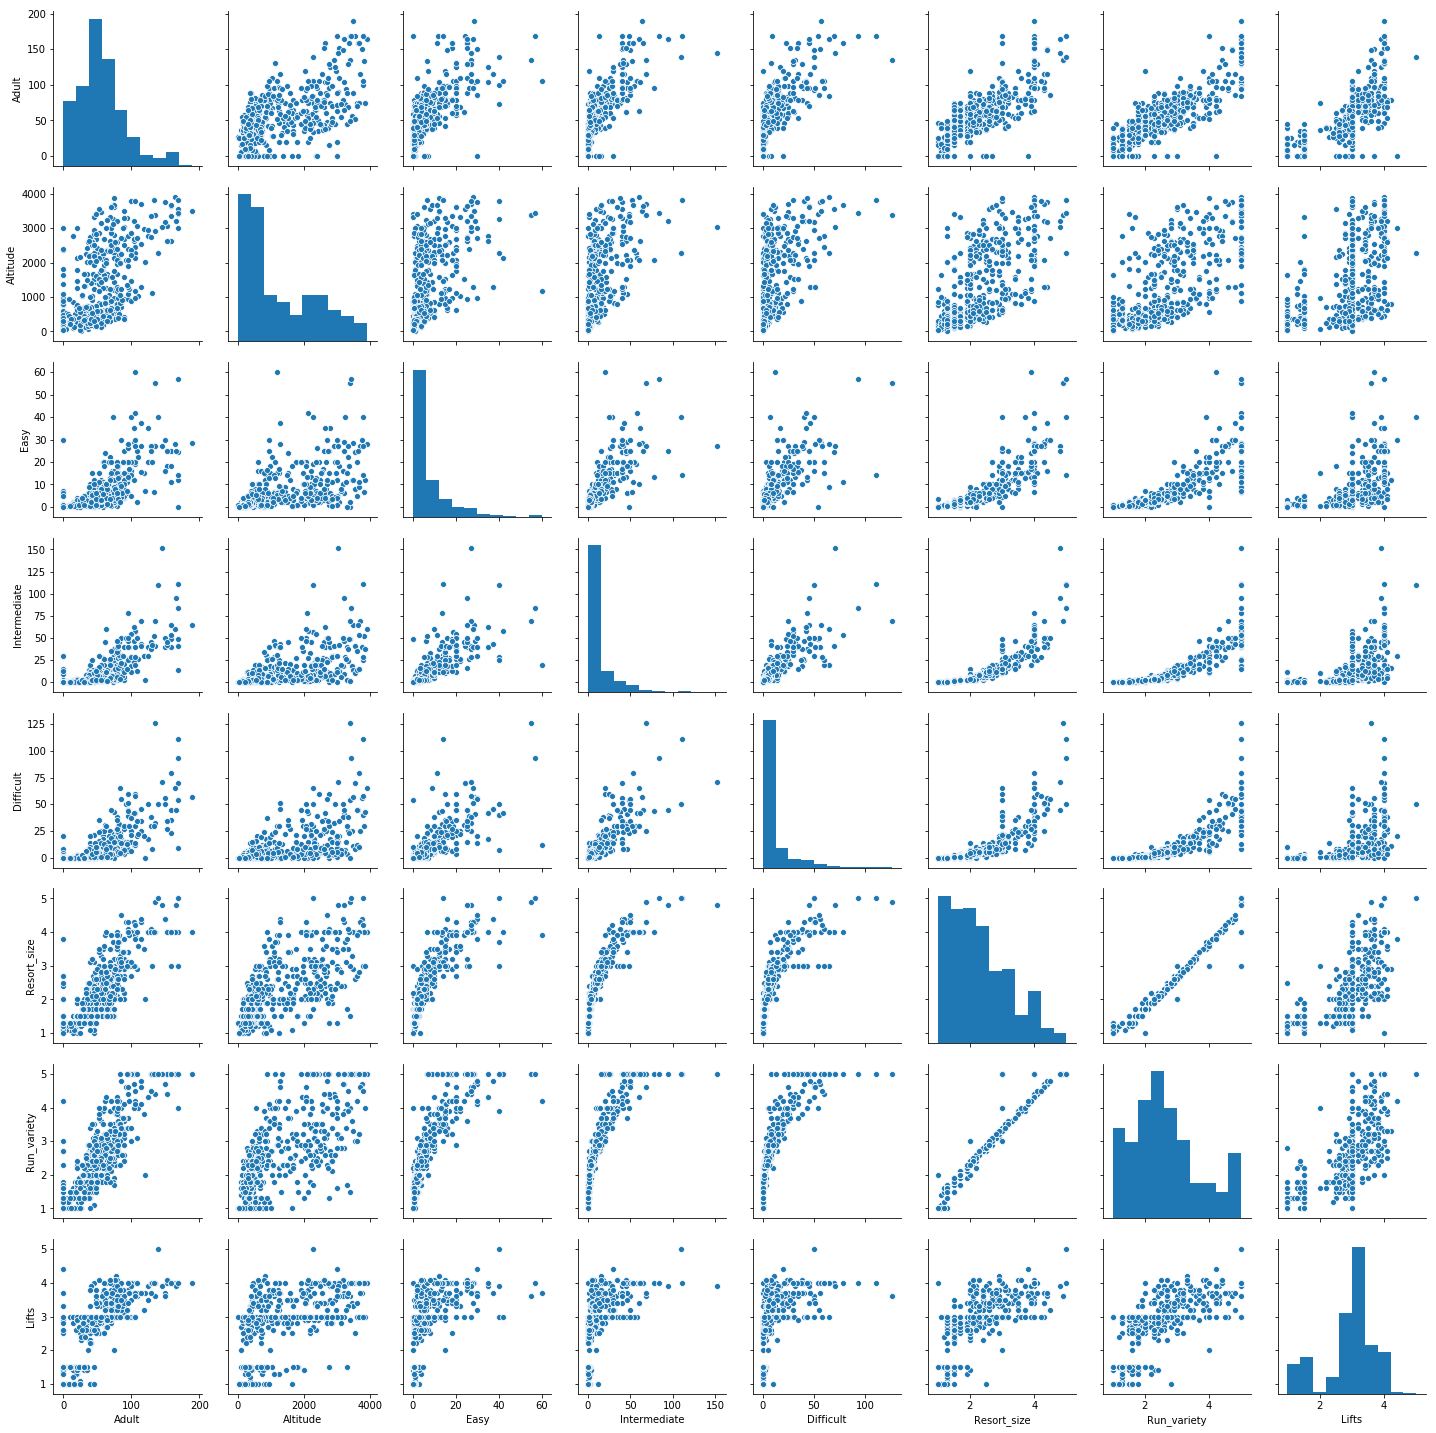

In [22]:
sns.pairplot(dummified_ski_NA_df_clean1[['Adult', 'Altitude', 'Easy', 'Intermediate', 'Difficult', 'Resort_size', 'Run_variety', 'Lifts']])

In [1100]:
# run variety pretty much doubles the easy, intermediate, difficult features
drop_feature_colinear_df = dummified_ski_NA_df_clean1.drop(columns = ['Run_variety'])
# change easy, intermediate and difficult into ratios, add new feature trail lengths

feature_engineering_df = 

In [1083]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import seaborn as sns
import matplotlib.pyplot as plt

1. find correlation between features to check for colinearity
3. try using regularization, this could go hand in hand with 
4. then do a fit on polynomial regression. also try logging stats that would seem log(features that may take off). and exp (features that should plateau). check fit with cross validation.
5. diagnostic tool to see if overfit or under fit. depending on crossval r and training r.
6. diagnostic tool to see if more data should be used.

If time permits, could've gotten more features:
proximity to largest neighboring city
snow park rating
ski village rating

Also if I had more time and money going to a bunch of resorts assigning them grades then fitting a model for ratings would help me determine which resorts are worth going to!
Resorts I've been to:
Whistler 4.7
Heavenly 4
Kirkwood 4
Boyne Highland
Squaw Valley
Treetops

Ski resorts  
Everyone wants: cheap
I want: good snow and has enough non-beginner slopes
good? means average base thickness and high snow days. regress between those two and snow reliability rating?
Friends want: (beginner slopes exist)
Maybe create a formula that balances price, slopes and thickness. With friends: more weight on price. By myself: less weight on price
Really for me it's about having as few bad days as possible while paying less
(Not much regression required)
Also: Can find the relationship between (snow, number of trails other factors, proximity to nearest airport or big city) and price. Regression required, but what problem am I trying to solve?

Could find the correlation between ratings for a season with traffic, snowfall and other factors affecting ratings

Plane tickets  
Plane tickets for two weeks in HK
Problems: When to visit and when to buy? Single trip or round trip. Stop or no stop.

Process:
scrape data and find csvs (selenium and beautifulsoup)
clean with modules then manually clean (patsy)
use linear regression on applicable data series (scikitlearn)
make graphs(seaborn)

In [447]:
with open('all_resorts.pkl', 'wb') as picklefile:
    pickle.dump(resort_dict, picklefile)